In [1]:
import pandas as pd
import numpy as np
titanic = pd.read_csv('titanic.csv' , low_memory=False)

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic = titanic[titanic['Embarked'].notna()]
titanic = titanic[titanic['Pclass'].notna()]
titanic = titanic[titanic['Sex'].notna()]
titanic = titanic[titanic['SibSp'].notna()]
titanic = titanic[titanic['Parch'].notna()]
titanic = titanic[titanic['Age'].notna()]
gender = {'male': 1,'female': 2}
titanic.Sex = [gender[item] for item in titanic.Sex]
titanic = titanic[titanic['Embarked'].notna()]
Embark = {'S' : 1 , 'C' : 2 , 'Q' : 3}
titanic.Embarked = [Embark[item] for item in titanic.Embarked]

In [4]:
titanic_select = titanic[[ "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]].copy()
survived = titanic[["Survived"]]

In [8]:
x_train = titanic_select[:530]
y_train = survived[:530]
x_test = titanic_select[530:]
y_test = survived[530:]
history = {}
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scalar_train= preprocessing.StandardScaler().fit(x_train)
scalar_test= preprocessing.StandardScaler().fit(x_test)
x_train_scale = scalar_train.transform(x_train)
x_test_scale = scalar_test.transform(x_test)

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
import tensorboard
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape = 6),
keras.layers.Dense(18, activation="relu"),
keras.layers.Dense(10, activation="relu"),
keras.layers.Dense(2, activation="sigmoid")])
model.save_weights("weights")

In [28]:
model.load_weights("weights")
optimizer1 = keras.optimizers.RMSprop(lr=0.002, rho=0.9)
model.compile(loss="sparse_categorical_crossentropy", 
optimizer=optimizer1,
metrics=["accuracy"])
history["RMSprop"] = model.fit(x_train_scale , y_train , epochs= 80 , validation_split=0.15 )
predict_mlp = model.predict_classes(x_test_scale)
print(classification_report(predict_mlp , y_test))

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/80
15/15 [==============================] - 0s 9ms/step - loss: 0.6146 - accuracy: 0.6956 - val_loss: 0.5524 - val_accuracy: 0.7375
Epoch 2/80
15/15 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7800 - val_loss: 0.5233 - val_accuracy: 0.7500
Epoch 3/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7956 - val_loss: 0.5087 - val_accuracy: 0.7375
Epoch 4/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7956 - val_loss: 0.5101 - val_accuracy: 0.7625
Epoch 5/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.8067 - val_loss: 0.5053 - val_accuracy: 0.7750
Epoch 6/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8067 - val_loss: 0.5083 - val_accuracy: 0.7625
Epoch 7/80
15/15 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.8111 - val_loss: 0.5128 - val_accuracy: 0.7625
Epoch 8/80
15/15 [==

15/15 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8311 - val_loss: 0.5473 - val_accuracy: 0.8000
Epoch 60/80
15/15 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8289 - val_loss: 0.5448 - val_accuracy: 0.8000
Epoch 61/80
15/15 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8333 - val_loss: 0.5696 - val_accuracy: 0.7750
Epoch 62/80
15/15 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8356 - val_loss: 0.5799 - val_accuracy: 0.7750
Epoch 63/80
15/15 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8311 - val_loss: 0.5701 - val_accuracy: 0.7750
Epoch 64/80
15/15 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8289 - val_loss: 0.5627 - val_accuracy: 0.7750
Epoch 65/80
15/15 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8311 - val_loss: 0.5661 - val_accuracy: 0.7750
Epoch 66/80
15/15 [======

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
model.load_weights("weights")
optimizer2 = keras.optimizers.SGD(lr=0.002)
model.compile(loss="sparse_categorical_crossentropy", 
optimizer=optimizer2,
metrics=["accuracy"])
history["SGD"] = model.fit(x_train_scale , y_train , epochs=80,validation_split=0.15 )
predict_mlp = model.predict_classes(x_test_scale)
print(classification_report(predict_mlp , y_test))

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/80
15/15 [==============================] - 0s 8ms/step - loss: 0.7114 - accuracy: 0.5756 - val_loss: 0.7129 - val_accuracy: 0.5875
Epoch 2/80
15/15 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5822 - val_loss: 0.7010 - val_accuracy: 0.5750
Epoch 3/80
15/15 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.6067 - val_loss: 0.6903 - val_accuracy: 0.6125
Epoch 4/80
15/15 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6244 - val_loss: 0.6805 - val_accuracy: 0.6125
Epoch 5/80
15/15 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6444 - val_loss: 0.6703 - val_accuracy: 0.6125
Epoch 6/80
15/15 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6556 - val_loss: 0.6611 - val_accuracy: 0.6625
Epoch 7/80
15/15 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6667 - val_loss: 0.6523 - val_accuracy: 0.6875
Epoch 8/80
15/15 [==

15/15 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7978 - val_loss: 0.5282 - val_accuracy: 0.7125
Epoch 60/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7978 - val_loss: 0.5277 - val_accuracy: 0.7125
Epoch 61/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7978 - val_loss: 0.5271 - val_accuracy: 0.7125
Epoch 62/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7978 - val_loss: 0.5266 - val_accuracy: 0.7125
Epoch 63/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7956 - val_loss: 0.5264 - val_accuracy: 0.7125
Epoch 64/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7978 - val_loss: 0.5259 - val_accuracy: 0.7125
Epoch 65/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7978 - val_loss: 0.5257 - val_accuracy: 0.7125
Epoch 66/80
15/15 [======

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
model.load_weights("weights")
optimizer2 = keras.optimizers.SGD(lr=0.002, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", 
optimizer=optimizer2,
metrics=["accuracy"])
history["momentum"] = model.fit(x_train_scale , y_train , epochs= 80 , validation_split=0.15 )
predict_mlp = model.predict_classes(x_test_scale)
print(classification_report(predict_mlp , y_test))

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/80
15/15 [==============================] - 0s 8ms/step - loss: 0.6980 - accuracy: 0.5978 - val_loss: 0.6609 - val_accuracy: 0.7000
Epoch 2/80
15/15 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.6844 - val_loss: 0.6048 - val_accuracy: 0.8000
Epoch 3/80
15/15 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7356 - val_loss: 0.5731 - val_accuracy: 0.7500
Epoch 4/80
15/15 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7800 - val_loss: 0.5542 - val_accuracy: 0.7375
Epoch 5/80
15/15 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7956 - val_loss: 0.5427 - val_accuracy: 0.7375
Epoch 6/80
15/15 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.8000 - val_loss: 0.5367 - val_accuracy: 0.7250
Epoch 7/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.8022 - val_loss: 0.5309 - val_accuracy: 0.7125
Epoch 8/80
15/15 [==

15/15 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8178 - val_loss: 0.5354 - val_accuracy: 0.7625
Epoch 60/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8222 - val_loss: 0.5404 - val_accuracy: 0.7625
Epoch 61/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8222 - val_loss: 0.5397 - val_accuracy: 0.7500
Epoch 62/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8222 - val_loss: 0.5423 - val_accuracy: 0.7500
Epoch 63/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8222 - val_loss: 0.5318 - val_accuracy: 0.7625
Epoch 64/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8222 - val_loss: 0.5299 - val_accuracy: 0.7625
Epoch 65/80
15/15 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8200 - val_loss: 0.5334 - val_accuracy: 0.7625
Epoch 66/80
15/15 [======

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
model.load_weights("weights")
optimizer3 = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", 
optimizer=optimizer3,
metrics=["accuracy"])
history["Adam"] = model.fit(x_train_scale , y_train , epochs=80 , validation_split=0.15 )
predict_mlp = model.predict_classes(x_test_scale)
print(classification_report(predict_mlp , y_test))

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/80
15/15 [==============================] - 0s 8ms/step - loss: 0.6806 - accuracy: 0.6089 - val_loss: 0.6375 - val_accuracy: 0.7125
Epoch 2/80
15/15 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.7133 - val_loss: 0.5881 - val_accuracy: 0.8125
Epoch 3/80
15/15 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.7467 - val_loss: 0.5613 - val_accuracy: 0.7500
Epoch 4/80
15/15 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7733 - val_loss: 0.5382 - val_accuracy: 0.7125
Epoch 5/80
15/15 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7889 - val_loss: 0.5235 - val_accuracy: 0.7000
Epoch 6/80
15/15 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.8022 - val_loss: 0.5131 - val_accuracy: 0.7375
Epoch 7/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7933 - val_loss: 0.5095 - val_accuracy: 0.7375
Epoch 8/80
15/15 [==

15/15 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8156 - val_loss: 0.5411 - val_accuracy: 0.7500
Epoch 60/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8178 - val_loss: 0.5539 - val_accuracy: 0.7625
Epoch 61/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8200 - val_loss: 0.5663 - val_accuracy: 0.7750
Epoch 62/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8178 - val_loss: 0.5624 - val_accuracy: 0.7750
Epoch 63/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8178 - val_loss: 0.5590 - val_accuracy: 0.7750
Epoch 64/80
15/15 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8178 - val_loss: 0.5455 - val_accuracy: 0.7750
Epoch 65/80
15/15 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8178 - val_loss: 0.5456 - val_accuracy: 0.7750
Epoch 66/80
15/15 [======

/home/amir/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


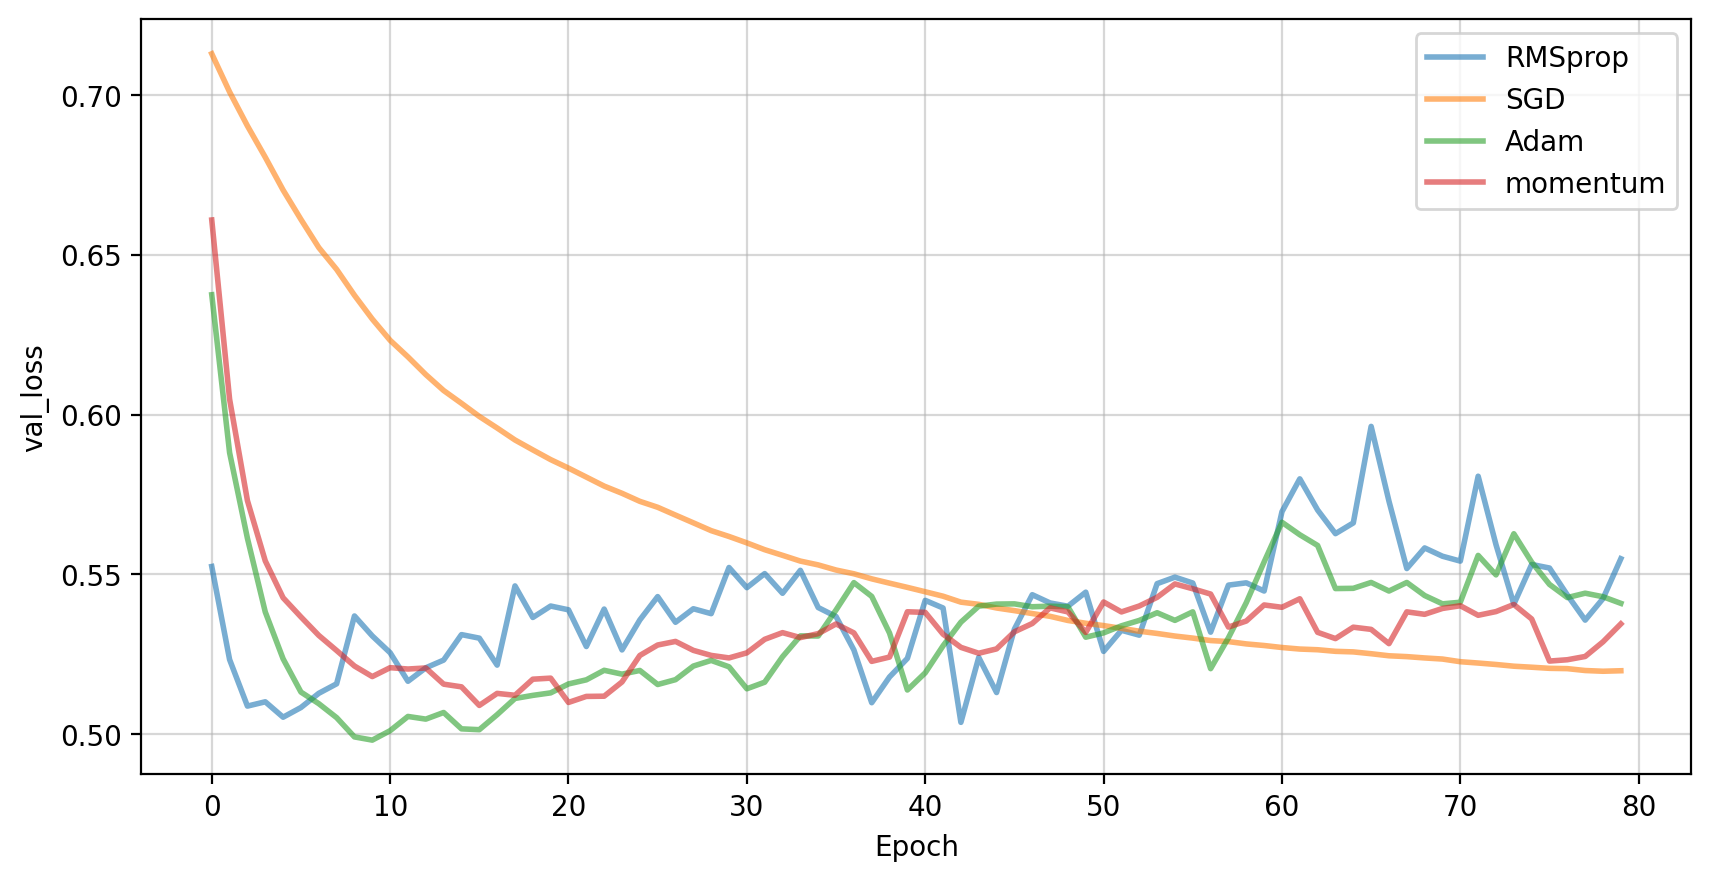

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), dpi=200)
for key in history.keys():
    plt.plot(history[key].history["val_loss"] , lw=2, label=key, alpha=0.6)
    # plt.plot(history[key].history["val_loss"], lw=3, label=key, alpha=0.7, ls=':')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.savefig('val_loss.png', dpi=200)

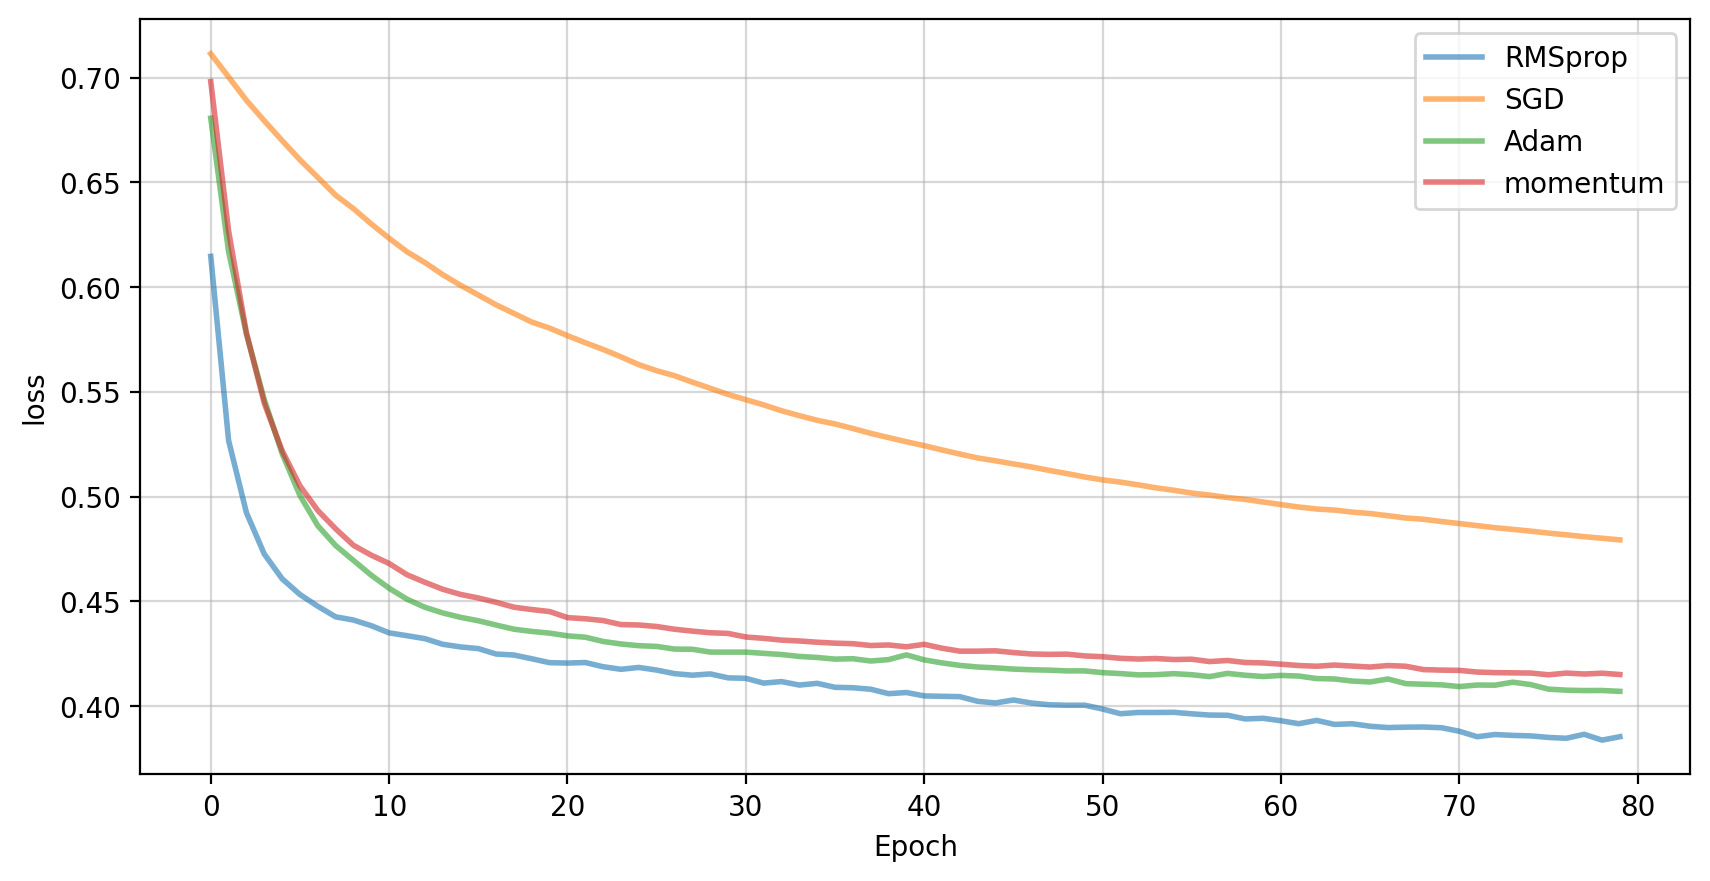

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), dpi=200)
for key in history.keys():
    plt.plot(history[key].history["loss"] , lw=2, label=key, alpha=0.6)
    # plt.plot(history[key].history["val_loss"], lw=3, label=key, alpha=0.7, ls=':')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.savefig('loss.png', dpi=200)